In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as knn
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import svm
import os
import time
from sklearn.metrics import f1_score

In [17]:
def svm_func(train,test,parameters=[1,2,4,6,8,10]):
  x_train=train[:,0:-1]
  y_train=train[:,-1]
  x_test=test[:,0:-1]
  y_test=test[:,-1]
  n_component=0.9
  pca = PCA(random_state=42,n_components=n_component)
  train_data_reduction=pca.fit_transform(x_train)
  test_data_reduction=pca.transform(x_test)
  result=[]
  for i in parameters:
      clf = svm.SVC(C=i)
      clf.fit(train_data_reduction,y_train)
      result.append(clf.score(test_data_reduction,y_test))
  parameters_str = [str(j) for j in parameters]
  plt.plot(parameters_str,result,color='b',marker='o',linestyle='dashed')
  plt.xlabel('C value')
  plt.ylabel('mean of accuaracy')
  plt.show()
  max_index=result.index(max(result))
  parameter=parameters[max_index]
  print(max(result))

def svm_func_sp(train,test,parameters=[1,2,4,6,8,10]):
  x_train=train[:,0:-1].astype(np.float32)
  y_train=train[:,-1]
  x_test=test[:,0:-1].astype(np.float32)
  y_test=test[:,-1]
  # n_component=0.9
  # pca = PCA(random_state=42,n_components=n_component)
  # train_data_reduction=pca.fit_transform(x_train)
  # test_data_reduction=pca.transform(x_test)
  result=[]
  for i in parameters:
      clf = svm.SVC(C=i)
      clf.fit(x_train,y_train)
      result.append(clf.score(x_test,y_test))
  parameters_str = [str(j) for j in parameters]
  plt.plot(parameters_str,result,color='b',marker='o',linestyle='dashed')
  plt.xlabel('C value')
  plt.ylabel('mean of accuaracy')
  plt.show()
  max_index=result.index(max(result))
  parameter=parameters[max_index]
  print(max(result))

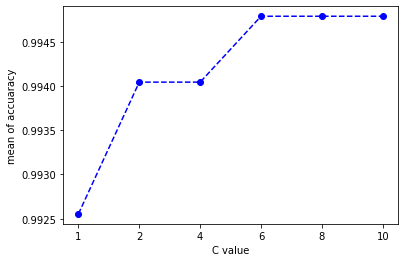

0.9947877885331348
Time used 3.45s


In [11]:
data_train_set_letter=pd.read_csv('./train_data_area.csv').values
data_test_set_letter=pd.read_csv('./test_data_area.csv').values
start=time.time()
svm_func(data_train_set_letter,data_test_set_letter)
end=(time.time()-start)
print("Time used {:.2f}s".format(end))

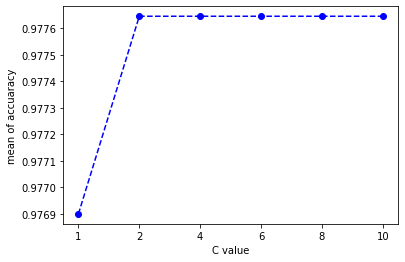

0.977645305514158
Time used 34.91s


In [12]:
data_train_set_letter_s=pd.read_csv('./train_data_area_sparse.csv').values
data_test_set_letter_s=pd.read_csv('./test_data_area_sparse.csv').values
start=time.time()
svm_func_sp(data_train_set_letter_s,data_test_set_letter_s)
end=(time.time()-start)
print("Time used {:.2f}s".format(end))

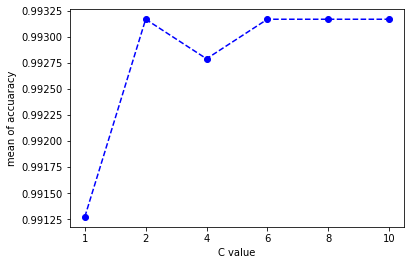

0.993168880455408
Time used 12.09s


In [13]:
import time

letter_train=pd.read_csv('./train_data_letter.csv').values
letter_test=pd.read_csv('./test_data_letter.csv').values
start=time.time()
svm_func(letter_train,letter_test)
used_time=(time.time()-start)
print("Time used {:.2f}s".format(used_time))

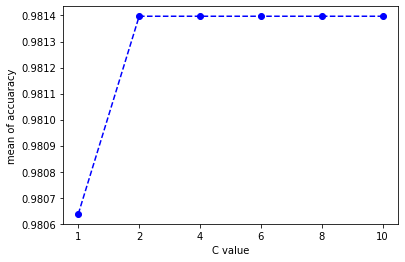

0.9813971146545178
Time used 117.19s


In [14]:
letter_train_s=pd.read_csv('./train_data_letter_sparse.csv').values
letter_test_s=pd.read_csv('./test_data_letter_sparse.csv').values
start=time.time()
svm_func_sp(letter_train_s,letter_test_s)
used_time=(time.time()-start)
print("Time used {:.2f}s".format(used_time))

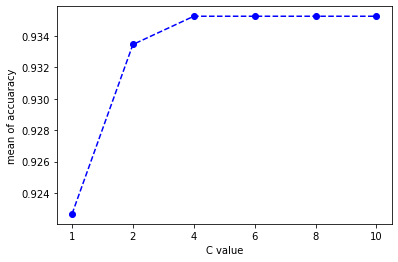

0.935251798561151
Time used 5.80s


In [15]:
province_train=pd.read_csv('./train_data_province.csv').values
province_test=pd.read_csv('./test_data_province.csv').values
start=time.time()
svm_func(province_train,province_test)
used_time=(time.time()-start)
print("Time used {:.2f}s".format(used_time))

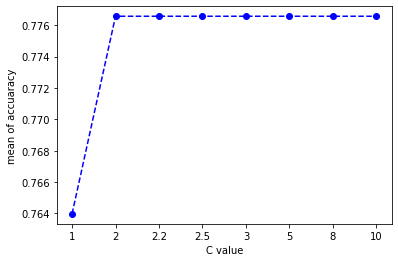

0.7765765765765765
Time used 22.68s


In [18]:
province_train_s=pd.read_csv('./train_data_province_sparse.csv').values
province_test_s=pd.read_csv('./test_data_province_sparse.csv').values
start=time.time()
svm_func_sp(province_train_s,province_test_s,[1,2,2.2,2.5,3,5,8,10])
used_time=(time.time()-start)
print("Time used {:.2f}s".format(used_time))